<a href="https://colab.research.google.com/github/Sohampimpalgaonkar/DL/blob/main/dl_pract_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Practical No. 07**

Write a program to implement and study analysis of PCA.

In [1]:
import pandas as pd
import numpy as np

# Create a sample DataFrame with two attributes (columns) and 1000 rows
data = {
    'x': np.random.rand(1000) * 20,  # Sample data for attribute x
    'y': np.random.rand(1000) * 20   # Sample data for attribute y
}
sample_df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
sample_df.to_csv('sample_data.csv', index=False)

print("CSV file 'sample_data.csv' created successfully with 1000 rows.")
print("\nFirst 5 rows of the created CSV file:")
display(sample_df.head())

CSV file 'sample_data.csv' created successfully with 1000 rows.

First 5 rows of the created CSV file:


,x,y
0,1.095241,1.480383
1,14.238309,3.292841
2,11.201723,19.556211
3,11.692152,1.137953
4,16.573175,12.514115


Original Data:
            x          y
0   1.095241   1.480383
1  14.238309   3.292841
2  11.201723  19.556211
3  11.692152   1.137953
4  16.573175  12.514115

Standardized Data:
           x         y
0 -1.529194 -1.481942
1  0.757342 -1.167822
2  0.229059  1.650808
3  0.314380 -1.541289
4  1.163545  0.430331

Covariance Matrix:
 [[1.         0.08790114]
 [0.08790114 1.        ]]

Eigenvalues:
 [1.08790114 0.91209886]

Eigenvectors:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Principal Component:
 [0.70710678 0.70710678]


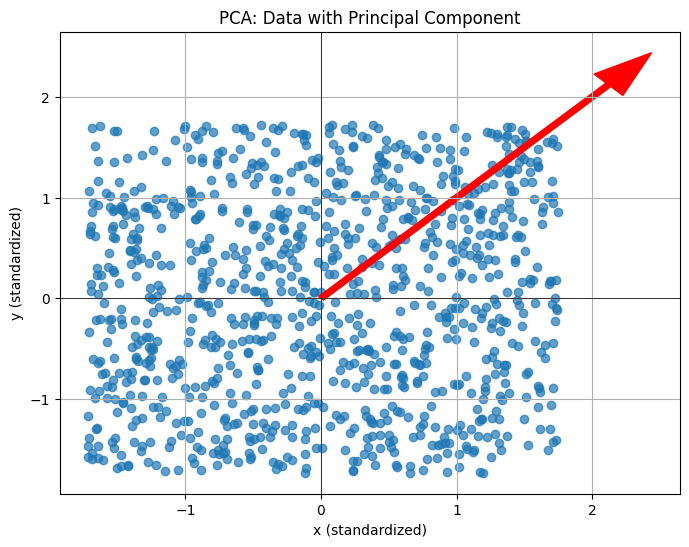

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load data from CSV
data = pd.read_csv('/content/sample_data.csv')  # replace with your CSV file path
print("Original Data:\n", data.head())

# Step 2: Standardize the data (mean=0, std=1)
data_mean = data.mean()
data_std = data.std()
data_standardized = (data - data_mean) / data_std
print("\nStandardized Data:\n", data_standardized.head())

# Step 3: Compute the covariance matrix
cov_matrix = np.cov(data_standardized.T)
print("\nCovariance Matrix:\n", cov_matrix)

# Step 4: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nEigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)

# Step 5: Identify the principal component (largest eigenvalue)
principal_component_index = np.argmax(eigenvalues)
principal_component = eigenvectors[:, principal_component_index]
print("\nPrincipal Component:\n", principal_component)

# Step 6: Plot the standardized data with the principal component
plt.figure(figsize=(8,6))
plt.scatter(data_standardized['x'], data_standardized['y'], alpha=0.7)
plt.xlabel('x (standardized)')
plt.ylabel('y (standardized)')
plt.title('PCA: Data with Principal Component')

# Plot the principal component vector (scaled for visibility)
pc_vector = principal_component * 3  # scale factor
plt.arrow(0, 0, pc_vector[0], pc_vector[1], color='red', width=0.05, head_width=0.3, label='Principal Component')

plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()
